In [ ]:
# Warmup 0a: Run these!
import os
from collections import namedtuple

In [ ]:
# Warmup 0b:
# Give an example of a mutable object... list
# Give an example of an immutable object... tuple

In [ ]:
# Warmup 1: Create a type Fruit that has 3 attributes (use namedtuple)
#            - name
#            - num_seeds
#            - juicyness
Fruit = namedtuple("Fruit", ['name', 'num_seeds', 'juicyness'])

In [ ]:
# Warmup 2: Add three fruits to the list. You choose!
#            - name should be a string
#            - num_seeds should be an int
#            - juicyness should be a float between [0.0, 100.0]
fruits = [
    Fruit("Apple", 20, 25.0),
    Fruit("Pineapple", 0, 75.0),
    Fruit("Strawberry", 100, 45.0)
]

In [ ]:
# Warmup 3: Sort fruits based on juicyness
fruits.sort(key=lambda f:f.juicyness)
fruits

In [ ]:
# Warmup 4: Create a list of fruits that have >10 seeds.
[f for f in fruits if f.num_seeds > 10]

In [ ]:
# Warmup 5: Same thing as above, but just the names of the fruit.
[f.name for f in fruits if f.num_seeds > 10]

In [ ]:
# Warmup 6: Same thing as above, but if it has juicyness > 33, display it in uppercase.
[f.name.upper() if f.juicyness > 33 else f.name for f in fruits if f.num_seeds > 10]

In [ ]:
# Warmup 7: Create a dictionary mapping each fruit's name to its total # of seeds
{f.name: f.num_seeds for f in fruits}

In [ ]:
# Warmup 8: Can you change the name of a fruit?
# No, namedtuples are immutable.
fruits[0].name = "fail"

In [ ]:
# Warmup 9: Catch any errors the user may make.

user_fruits = []
while(True):
    print("Current fruits", user_fruits)
    try:
        fruit_name = input("Enter a name for the fruit... ")
        fruit_seeds = int(input("Enter a num_seeds for the fruit... "))
        fruit_juicy = float(input("Enter a juicyness for the fruit... "))
        user_fruits.append(Fruit(fruit_name, fruit_seeds, fruit_juicy))
    except Exception as e:
        print("Name must be a str, num_seeds must be an int, and juicyness must be a float!")
        print(type(e))

## Lecture 26:  Files and Directories

**Learning Objectives:**

 - Use built-in functions with files:
   - open
   - close
   - read
   - write
 - Use file-specific os module functions:
   - os.listdir
   - os.mkdir
   - os.path.exists
   - os.path.isfile
   - os.path.isdir
   - os.path.join

 - Use try/except blocks or a with statement to handle errors that may occur when using files

This content will be on Wednesday's exam!

### Use built-in functions with files: open, close, read, write

In [ ]:
# example 1a:  let's learn how to write to a file

# open a file,  give it a name, prepare it for writing
file_obj = open("debug_tips.txt", "w")

# Add this content:
# Debug Tips:
# 1. Write the least amount of code you can test
# 2. Don't try to write the complete solution at first
# 3. Assume from the start that things will go wrong
# 4. Always know the state of your program (print out vital information)

# use the write command to write a string to the file
file_obj.write("Debug Tips:\n")
file_obj.write("1. Write the least amount of code you can test\n")

# TODO Complete the rest!
file_obj.write("2. Don't try to write the complete solution at first\n")
file_obj.write("3. Assume from the start that things will go wrong\n")
file_obj.write("4. Always know the state of your program (print out vital information)\n")

# you MUST close the file for the changes to actual be stored in the file
file_obj.close()


In [ ]:
# Next: Let's write 10 random ints (from 1 to 5) to a file
import random
path = "nums.txt"  
fo = open(path, "w")
for i in range(10):
    fo.write(str(random.randint(1,5)) + "\n")
fo.close()

In [ ]:
# Now: Let's OVERWRITE THE FILE by writing 10K random ints (from 1 to 10) to a file
import random
path = "nums.txt"  
fo = open(path, "w")
for i in range(10000):
    fo.write(str(random.randint(1,10)) + "\n")
fo.close()

In [ ]:
# Think Back: What if we want to write one more debugging tip?
file_obj = open("debug_tips.txt", "w")
file_obj.write("5. Writing a program is not a linear path; there will be ups and downs!\n")
file_obj.close()
# We'll come back to this!

### Reading Files

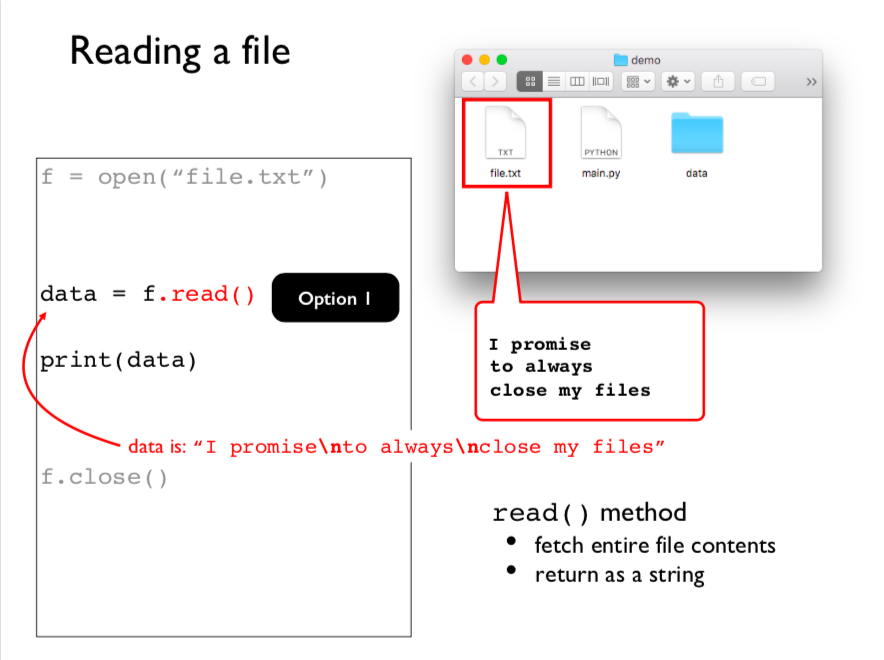

In [ ]:
path = "debug_tips.txt"
# create a file object but open for READING
f_obj = open(path, 'r') # "r" is optional
data = f_obj.read()
print(data)
f_obj.close()

In [ ]:
# TODO Add the fifth debugging tip, but do not
# overwrite what's currently in the file!

# Read in the previous text..
path = "debug_tips.txt"
f_obj = open(path, 'r') # "r" is optional
data = f_obj.read()
f_obj.close()

file_obj = open(path, "w")
# ... and add it on to the new.
file_obj.write(data)
file_obj.write("5. Writing a program is not a linear path; there will be ups and downs!\n")
file_obj.close()

In [ ]:
# or... open the file in "append" mode.
file_obj = open("debug_tips.txt", "a")
file_obj.write("5. Writing a program is not a linear path; there will be ups and downs!\n")
file_obj.close()

In [ ]:
# alternative way to read: as a list

file_obj = open("debug_tips.txt", "r")
my_data = list(file_obj)
print(my_data)
file_obj.close()

In [ ]:
# TODO: Sum all the numbers in nums.txt!
path = "nums.txt"
f_obj = open(path, 'r') # "r" is optional
lines = list(f_obj)
nums = []
for line in lines:
    actualNum = int(line.strip())
    nums.append(actualNum)
sum(nums)

### Use these file-specific os module functions:

- os.listdir
- os.mkdir 
- os.path.exists 
- os.path.isfile
- os.path.isdir 
- os.path.join

In [ ]:
os.listdir(".") # creates a list from the contents of a directory

In [ ]:
# Make a directory...
# Similar to mkdir command in PowerShell.
# Note if you run the same command twice,
# the 2nd time you will get an error. Why?

os.mkdir("coles folder")
os.listdir(".")

In [ ]:
# os.path is a sub-module of os .... does not need importing again
print(os.path.exists("coles folder")) # does this file/folder (at this path) exist?
print(os.path.isfile("coles folder")) # nope
print(os.path.isdir("coles folder")) # yep

In [ ]:
# This function is like the list join method, which combines things into a string,
# but it automatically senses which OS you are using and joins them with either a \ or /

path = os.path.join("my_folder","file1.txt")
print(path)  # what do you get? 

**There are lots of things that can go wrong when reading or writing files**
- file does not exist
- you don't have write permission
- not enough space on the drive to write out the entire file
- use a directory name in place file name (or vice versa)
- and more....

In [ ]:
# let's figure out how to handle a command to open a file that does not exist

path = input("enter the name of the file to open:")
try:
    file_object = open(path, "r")  # "r" is for reading, but is the default
    d = file_object.read()
    print(d)
    file_object.close()
except FileNotFoundError as e:
    print(type(e))
    print(path, "could not be opened")

# Does this cover all exceptions? What else could go wrong?
# What does this mean for opening and closing a file?

**Python is all about shortening code. Is there a way to shorten the process of:**
- opening a file
- handling any Errors while reading/writing
- closing the file

In [ ]:
# we can use a 'with' statement to shorten our code

import random

with open("some_numbers.txt", "w") as f: 
    for i in range(10):
        f.write(str(random.randint(1,100)) + "\n")
                
# don't need to close, even if there's an error!

In [ ]:
# Take a look at your file organizer to find the file some_numbers.txt

**Case Studies:  Mostly finished, larger programs**

Goal:  Run the program, read the code, make small changes


In [ ]:
# Case Study: score tracker

# remember:  a JSON file is structured like a Python dictionary
# so its easy to convert back and forth
# JSONDecodeError when there is issues with the json file


import json  # to read/write a JSON file
import os    # to see if score file exists

def read_json(path):
    with open(path, encoding="utf-8") as f:
        return json.load(f) # dict, list, etc

# data is a dict, list, etc
def write_json(path, data):
    with open(path, 'w', encoding="utf-8") as f:
        json.dump(data, f, indent=2)
        

def add_point(player_name, file_name):
    scores = {}

    # TOOD: Check if "point.json" exists, if so load data from it
    if os.path.exists(file_name):
        scores = read_json(file_name)
        # TODO: Check if player is a known player
        if player_name in scores:
            scores[player_name] += 1
        else:
            scores[player_name] = 1
    else:
        scores[player_name] = 1
    write_json(file_name, scores)

    # TODO: print out each person's score
    print(scores)

In [ ]:
# You can try this yourself... different name, different file
# Then, go back to your Jupyter Notebook directory and open the file you made

In [ ]:
add_point("Cole", "points.json")

In [ ]:
# Case Study: Recursive File Searcher
# In an earlier lecture, we wrote a function that recursively searches a list of lists
# this program takes that idea and applies it to files and directories.

# To understand this program, you might want to first see what directories you have.
# TODO: Try exploring your computer with os.listdir
os.listdir("..")

In [ ]:
# program recursive file searcher

import os

def recursive_dir_search(searchDirectory, searchFileName):
    
    for curr in os.listdir(searchDirectory):   
        
        # build a path to this current thing
        curr = os.path.join(searchDirectory, curr) 
        
        #check if curr is a file
        if os.path.isfile(curr):
            #check if it contains the search name 
            if searchFileName in curr:     # base case...no recursive call
                f = open(curr)
                contents = f.read(50)      # reads first 50 chars into a string
                f.close()
                return contents
        else:                              # recursive case!!
            contents = recursive_dir_search(curr, searchFileName)
            if contents != None:           # we found something
                return contents           
            
    # finished all recursive searching and never found it   
    return None       


# this function is like our main program
def dir_search(dir_name, file_name):
    if not os.path.exists(dir_name):
        print("Unable to find searchDirectory!")
    else:
        contents = recursive_dir_search(dir_name, file_name)
        # TODO: Display the results of our recursive search.
        if contents == None:
            print(file_name, "not found")
        else:
            print(contents)

In [ ]:
dir_search("..", "project.py")

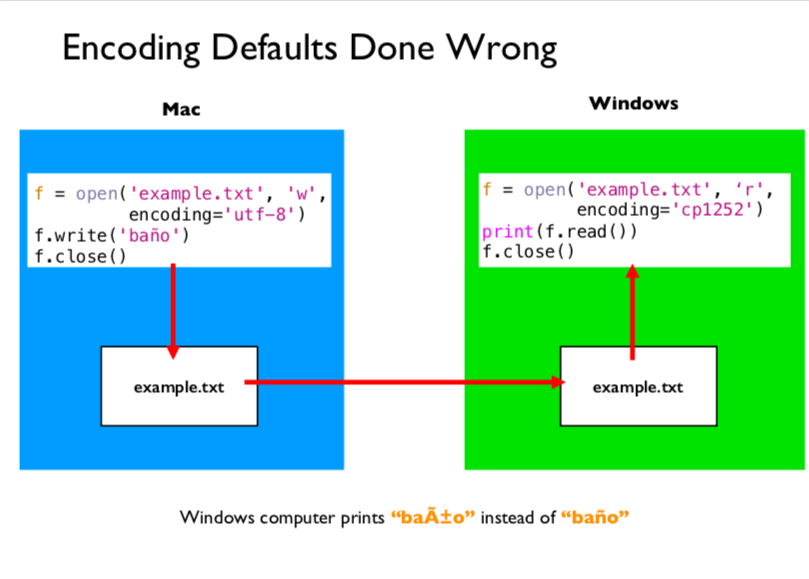

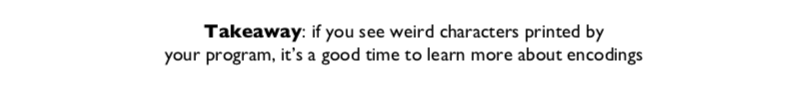
